# Data QA Engineer Assessment - Question 1

In [12]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Functions

def Plot_Bar_Chat(df, x, y, title="No Title"):
   ax = df.plot.bar(x=x, y=y, title=title)
   for i, v in enumerate(df[y]):
      ax.text(i, v+0.5, str(v), ha='center')
   plt.show()

In [14]:
# Load CSV's To DataFrames

df_claims = pd.read_csv('data\\sample_claims.csv', na_filter=False).convert_dtypes(infer_objects=True)
df_codes_cpt = pd.read_csv('data\\valid_cpt_codes.csv', na_filter=False).convert_dtypes(infer_objects=True)


#### Question 1-1 : What are the top 5 most common valid procedure codes?
Response: Visual results and code in next cell. By merging the claims data with valid procedure codes, we're able to drop the invalid codes (making no assumptions), and score only valid codes. 

- 1: 88175 - 155 occurrences
- 2: 87591 - 123 occurrences
- 3: 87491 - 122 occurrences
- 4: 87795 - 116 occurrences
- 5: 85049 - 107 occurrences

,procedure_code,count
183,88175,155
176,87591,123
169,87491,122
180,87798,116
99,85049,107


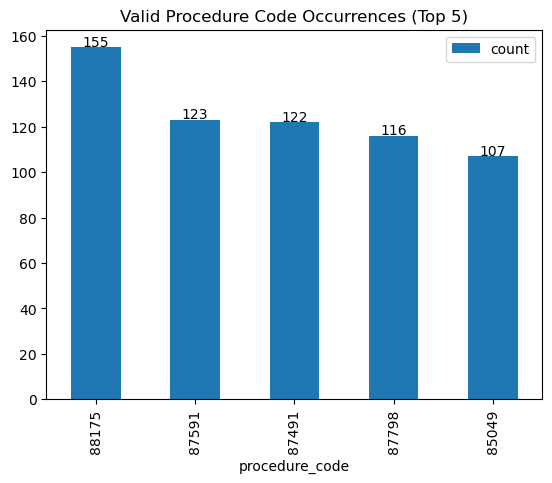

In [15]:
df_codes_cpt = df_codes_cpt.astype({'code': 'string'})

df_claims_valid_agg = (
    df_claims.merge(df_codes_cpt, left_on='procedure_code', right_on='code', how='inner')
        .groupby(['procedure_code'])
        .size()
        .reset_index(name='count')
        .sort_values('count', ascending=False)
        .head(5)
)

display(df_claims_valid_agg)
Plot_Bar_Chat(df_claims_valid_agg, 'procedure_code', 'count', 'Valid Procedure Code Occurrences (Top 5)')

#### Question 1-2 : How many patients are associated with at least one of those procedures? Please do not use the result values from 1a - provide code that will find the answer without specifying explicitly those code values.

Response: Code example in next cell. Accomplished by merging claims with valid procedure codes, and then counting unique patient id's.

Unique patients with at least one valid procedure code: 77

In [18]:
df_codes_cpt = df_codes_cpt.astype({'code': 'string'})

patients = df_claims.merge(
    df_codes_cpt, 
    left_on='procedure_code', 
    right_on='code', 
    how='inner')['patient_id'].nunique()

print("Patients with at least one valid procedure code: {}".format(patients))

Patients with at least one valid procedure code: 77
